In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import datetime
import json
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go 
import nbformat
from jupyter_dash import JupyterDash
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [46]:
#Read the zomato data
df1 = pd.read_csv(r"C:/Users/91934/OneDrive/Desktop/zomato_datavisulation/zomato (1).csv")
df1.head(4)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365


In [47]:
df2=pd.read_excel(r"C:/Users/91934/OneDrive/Desktop/zomato_datavisulation/Country-Code (5).xlsx")
df2.head(15)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [48]:
df = pd.merge(df1,df2, on='Country Code')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [50]:
df.shape

(9551, 22)

In [51]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [52]:
for col in df.columns[0:]:
    print(col, ': ', len(df[col].unique()), 'labels')

Restaurant ID :  9551 labels
Restaurant Name :  7446 labels
Country Code :  15 labels
City :  141 labels
Address :  8918 labels
Locality :  1208 labels
Locality Verbose :  1265 labels
Longitude :  8120 labels
Latitude :  8677 labels
Cuisines :  1826 labels
Average Cost for two :  140 labels
Currency :  12 labels
Has Table booking :  2 labels
Has Online delivery :  2 labels
Is delivering now :  2 labels
Switch to order menu :  1 labels
Price range :  4 labels
Aggregate rating :  33 labels
Rating color :  6 labels
Rating text :  6 labels
Votes :  1012 labels
Country :  15 labels


In [53]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [54]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

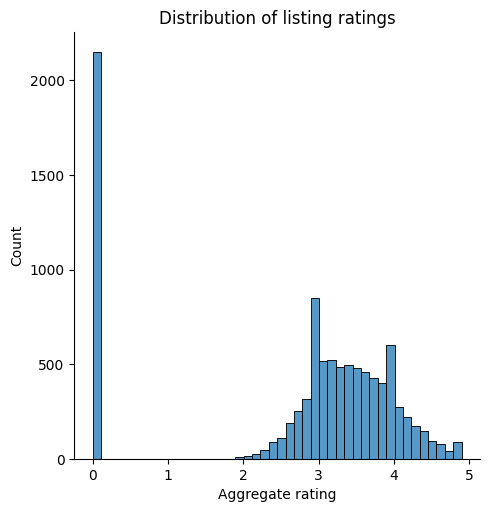

In [55]:

# Visualize the distribution of the rating column
sns.displot(df['Aggregate rating'])
plt.title('Distribution of listing ratings')
plt.show()

<Axes: xlabel='Aggregate rating', ylabel='Percent'>

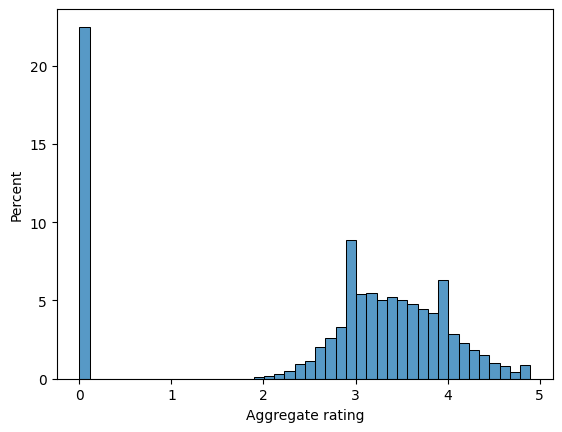

In [56]:
sns.histplot(x=df["Aggregate rating"],stat="percent")

In [57]:
df['Average Cost for two'].unique()

array([  1100,   1200,   4000,   1500,   1000,   2000,   6000,    800,
          900,    700,    850,    600,   3000,   1800,     55,     30,
           45,     60,     50,     80,     90,    200,    150,    100,
          230,    240,    350,    140,    170,    120,    250,     40,
           70,    300,     85,     75,    400,     65,     25,     10,
            0,     20,     35,      7,    270,    500,    430,    315,
          220,     95,    190,    260,    180,    330,    280,    160,
          285,    130,    110,   2500,   3600,    550,   1400,    450,
          950,    650,   1300,   2400,   1600,   2200,    750,   1700,
         1250,   1900,   2700,   3500,   5000,   2300,   1750,   3200,
         2100,   1850,   4500,   3300,   1350,   1650,   1950,   1050,
          290,   1450,   2800,   3650,   4800,   1550,    720,   6500,
         7000,   1150,   2900,   2600,   4700,   3700,   3800,   4100,
         4300,   2650,   5100,   5500,   4400,   4200,   8000,   2350,
      

In [58]:
df['Average Cost for two'].mean()

np.float64(1199.2107632708617)

In [59]:
a1=df['Average Cost for two']/2
print(a1)

0        550.0
1        600.0
2       2000.0
3        750.0
4        750.0
         ...  
9546      40.0
9547      52.5
9548      85.0
9549      60.0
9550      27.5
Name: Average Cost for two, Length: 9551, dtype: float64


In [60]:
df['Amount']= a1 * df['Price range']

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [62]:
df['Price range'].unique()

array([3, 4, 2, 1])

In [63]:
df['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(專)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [64]:
replace_dict = {'Botswana Pula(P)':'BWP', 'Brazilian Real(R$)':'BRL', 'Dollar($)':'USD',
       'Emirati Diram(AED)':'AED', 'Indian Rupees(Rs.)':'INR',
       'Indonesian Rupiah(IDR)':'IDR', 'NewZealand($)':'NZD', 'Pounds(專)':'GBP',
       'Qatari Rial(QR)':'QAR', 'Rand(R)':'ZAR', 'Sri Lankan Rupee(LKR)':'LKR',
       'Turkish Lira(TL)':'TRY'}


In [65]:
df = df.replace({'Currency':replace_dict}) 

In [66]:
df['Currency'].unique()

array(['BWP', 'BRL', 'USD', 'AED', 'INR', 'IDR', 'NZD', 'GBP', 'QAR',
       'ZAR', 'LKR', 'TRY'], dtype=object)

In [67]:
df['Rupees'] = 0
df2['Currency'] = ['INR','AUD', 'BRL', 'CAD','IDR','NZD','PHP','QAR','SGD','ZAR','LKR','TRY','AED', 'GBP','USD']
df2['Currency_rates']= [1,44.5,14.95,62.14,0.005,52.33,1.48,23.04,64.20,4.69,0.28,2.46,22.84,110.11,83.95]
df2

,Country Code,Country,Currency,Currency_rates
0,1,India,INR,1.000
1,14,Australia,AUD,44.500
2,30,Brazil,BRL,14.950
3,37,Canada,CAD,62.140
4,94,Indonesia,IDR,0.005
5,148,New Zealand,NZD,52.330
6,162,Phillipines,PHP,1.480
7,166,Qatar,QAR,23.040
8,184,Singapore,SGD,64.200
9,189,South Africa,ZAR,4.690


In [68]:
df = pd.merge(df,df2, on='Country Code')

In [69]:
df.drop(df.columns[[11,21]], axis=1, inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [71]:
df['Rupees'] = df['Amount']*df['Currency_rates']
df[['Country Code','Currency_y','Rupees'] ]

,Country Code,Currency_y,Rupees
0,162,PHP,2442.00
1,162,PHP,2664.00
2,162,PHP,11840.00
3,162,PHP,4440.00
4,162,PHP,4440.00
...,...,...,...
9546,208,TRY,295.20
9547,208,TRY,387.45
9548,208,TRY,836.40
9549,208,TRY,590.40


In [72]:
df= df.drop_duplicates()
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Price range,Aggregate rating,Rating color,Rating text,Votes,Amount,Rupees,Country_y,Currency_y,Currency_rates
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,3,4.8,Dark Green,Excellent,314,1650.0,2442.0,Phillipines,PHP,1.48
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,3,4.5,Dark Green,Excellent,591,1800.0,2664.0,Phillipines,PHP,1.48
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,4,4.4,Green,Very Good,270,8000.0,11840.0,Phillipines,PHP,1.48


In [73]:
! pip install ipykernel

In [74]:
#df = px.data.gapminder()
fig = px.area(df.groupby('Cuisines')['Country Code'].mean(),y = 'Country Code')


In [75]:
df_grouped = df.groupby('Cuisines')['Country Code'].mean().reset_index() 
fig = px.area(df_grouped, x='Cuisines', y='Country Code') 
fig.show()

In [76]:
fig = px.bar(df.groupby('Country_y')['Price range'].mean(),y='Price range')
fig = px.bar(df,x=('Country_y'),y=sorted(df['Cuisines'].astype(str),reverse=True),title = 'Cuisine Vs Country_y')
fig.show()

In [77]:
import plotly.express as px
import pandas as pd

# Group by 'Country' and calculate the mean of 'Price range'
grouped_df = df.groupby('Country_y')['Price range'].mean().reset_index()

# Create the first bar chart for 'Price range' by 'Country' with colors
fig1 = px.bar(grouped_df, x='Country_y', y='Price range', color='Country_y', 
              title='Average Price Range by Country')

# Ensure all Cuisines are strings
df['Cuisines'] = df['Cuisines'].astype(str)

# Sort 'Cuisines' in descending order
df_sorted = df.sort_values(by='Cuisines', ascending=False)

# Create the second bar chart for 'Cuisine' vs 'Country' with colors
fig2 = px.bar(df_sorted, x='Country_y', y='Cuisines',
              title='Cuisine vs Country_y')

# Show the first plot
fig1.show()

# Show the second plot
fig2.show()


In [78]:
! pip install jupyter-dash

In [80]:
days = df['Country_y'].unique()
app = JupyterDash(__name__)
#app = dash.Dash(__name__)


app.layout = html.Div([
   dcc.Dropdown(
       id="dropdown",
       options=[{"label": x, "value": x} for x in days],
       value=days[0],
       clearable=False,
   ),
   dcc.Graph(id="bar-chart"),
])


@app.callback(
   Output("bar-chart", "figure"),
   [Input("dropdown", "value")])
def update_bar_chart(day):
   mask = df["Country_y"] == day
   fig = px.bar(df[mask], x="Cuisines", y="Amount",
                color="Country_y", barmode="group")
   return fig


app.run_server(debug=True)

TypeError: 'NoneType' object cannot be interpreted as an integer

In [81]:
india_cities = df.loc[df['Country_y'] == 'India']
type(india_cities)
india_cities['City'].unique()

array(['Agra', 'Ahmedabad', 'Allahabad', 'Amritsar', 'Aurangabad',
       'Bangalore', 'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Chennai',
       'Coimbatore', 'Dehradun', 'Faridabad', 'Ghaziabad', 'Goa',
       'Gurgaon', 'Guwahati', 'Hyderabad', 'Indore', 'Jaipur', 'Kanpur',
       'Kochi', 'Kolkata', 'Lucknow', 'Ludhiana', 'Mangalore', 'Mohali',
       'Mumbai', 'Mysore', 'Nagpur', 'Nashik', 'New Delhi', 'Noida',
       'Panchkula', 'Patna', 'Puducherry', 'Pune', 'Ranchi',
       'Secunderabad', 'Surat', 'Vadodara', 'Varanasi', 'Vizag'],
      dtype=object)

In [82]:
highest_spent = india_cities.nlargest(1, 'Rupees')
highest_spent

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Price range,Aggregate rating,Rating color,Rating text,Votes,Amount,Rupees,Country_y,Currency_y,Currency_rates
7543,2701,Orient Express - Taj Palace Hotel,1,New Delhi,"Taj Palace Hotel, Diplomatic Enclave, Chanakya...","The Taj Palace Hotel, Chanakyapuri","The Taj Palace Hotel, Chanakyapuri, New Delhi",77.170087,28.595008,European,...,4,4.0,Green,Very Good,145,16000.0,16000.0,India,INR,1.0


In [83]:
my_data = india_cities.loc[india_cities['City'] == 'New Delhi']
max_cuisine = my_data['Cuisines'].max()
max_cuisine

'Vietnamese'

In [84]:
rate_vs_cus = india_cities.loc[india_cities['Cuisines'] == 'Vietnamese']
max_rating = rate_vs_cus['Aggregate rating'].max()
max_rating

np.float64(4.0)

In [85]:
india_cities['Has Online delivery'].max()
india_cities['Is delivering now' ].max()

'Yes'

In [86]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

In [87]:
#app = Dash(__name__)


app.layout = html.Div([
    html.H4('Online Delivery vs Dine-In'),
    dcc.Graph(id="graph"),
    dcc.Dropdown(id='names',
        options=['Has Online delivery'],
        value='day', clearable=False
    ),
    #html.P("Values:"),
    dcc.Dropdown(id='values',
        options=['Has Table booking'],
        value='total_bill', clearable=False
    ),
])


@app.callback(
    Output("graph", "figure"), 
    Input("names", "value"), 
    Input("values", "value"))
def generate_chart(names, values):
    df = px.df() # replace with your own data source
    fig = px.pie(df, values=values, names=names, hole=.3)
    return fig


#app.run_server(debug=True)
fig.show()

In [88]:
df.to_csv('zomatodata.csv',index=False)